In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
max_features = 10000
maxlen = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [4]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 63s 98ms/step - loss: 0.4074 - accuracy: 0.8012 - val_loss: 0.2962 - val_accuracy: 0.8774
Epoch 2/5
625/625 [==============================] - 64s 102ms/step - loss: 0.1563 - accuracy: 0.9423 - val_loss: 0.2882 - val_accuracy: 0.8842
Epoch 3/5
625/625 [==============================] - 61s 98ms/step - loss: 0.0339 - accuracy: 0.9915 - val_loss: 0.3627 - val_accuracy: 0.8872
Epoch 4/5
625/625 [==============================] - 61s 97ms/step - loss: 0.0049 - accuracy: 0.9995 - val_loss: 0.4242 - val_accuracy: 0.8894
Epoch 5/5
625/625 [==============================] - 63s 101ms/step - loss: 8.5099e-04 - accuracy: 0.9999 - val_loss: 0.4780 - val_accuracy: 0.8856


In [7]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

782/782 [==============================] - 22s 29ms/step


In [8]:
print("Sentiment Analysis Model (CNN):")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Sentiment Analysis Model (CNN):
Accuracy: 0.8799
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88     12500
           1       0.91      0.84      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [9]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [10]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

1641221/1641221 [==============================] - 0s 0us/step


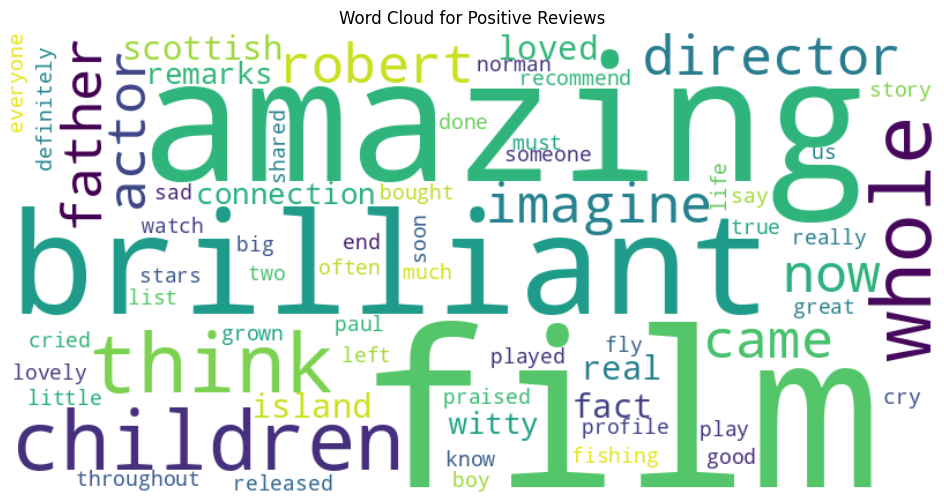

In [11]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[0]])
plot_wordcloud(decoded_review, 'Word Cloud for Positive Reviews')